In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sounddevice as sd

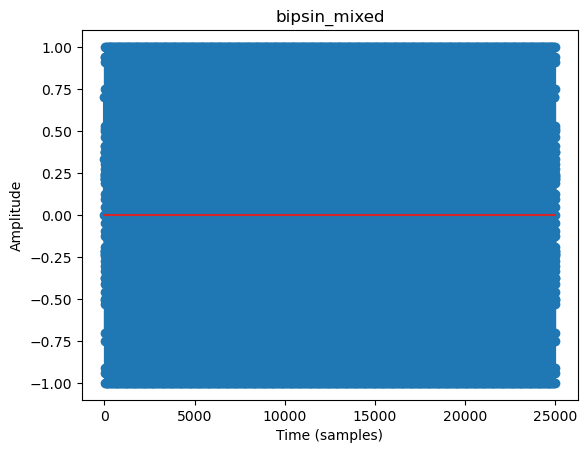

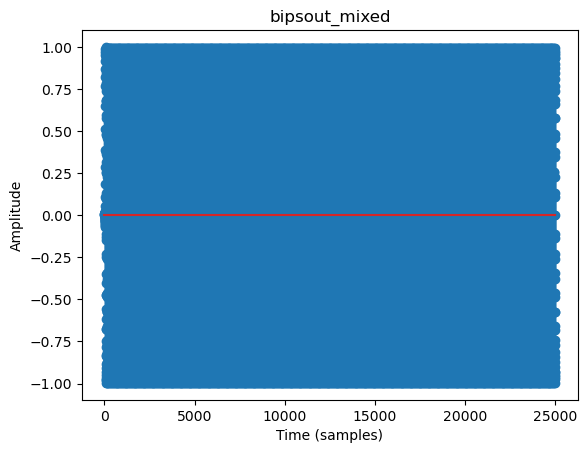

In [2]:
bipsin_mixed, fs = librosa.load('bipsin_mixed.wav', sr=None)
bipsout_mixed, fs = librosa.load('bipsout_mixed.wav', sr=None)

plt.stem(bipsin_mixed)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('bipsin_mixed')
plt.show()

plt.stem(bipsout_mixed)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('bipsout_mixed')
plt.show()

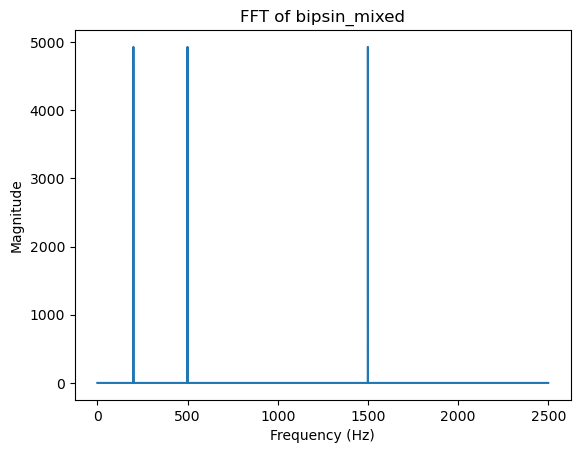

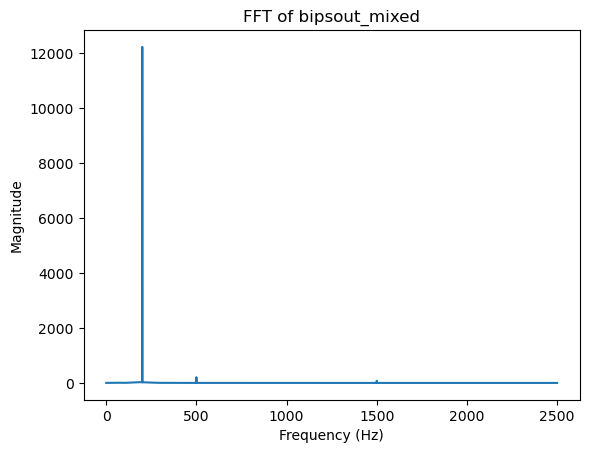

In [3]:
fft_bipsin_mixed = np.fft.fft(bipsin_mixed)
freqs = np.fft.fftfreq(len(bipsin_mixed), 1/fs)
fft_bipsin_mixed = fft_bipsin_mixed[freqs >= 0]
freqs = freqs[freqs >= 0]


fft_bipsout_mixed = np.fft.fft(bipsout_mixed)
freqs2 = np.fft.fftfreq(len(bipsout_mixed), 1/fs)
fft_bipsout_mixed = fft_bipsout_mixed[freqs2 >= 0]
freqs2 = freqs2[freqs2 >= 0]


plt.plot(freqs ,np.abs(fft_bipsin_mixed))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of bipsin_mixed')
plt.show()

plt.plot(freqs2 ,np.abs(fft_bipsout_mixed))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of bipsout_mixed')
plt.show()


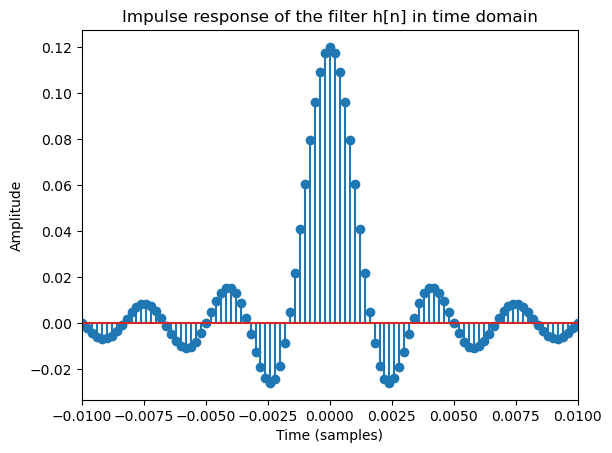

In [10]:
duracao = (len(bipsin_mixed))/fs
n = np.arange(-duracao/2, duracao/2, 1/fs)
fc = 300 # Frequência de corte do filtro

# Fazendo um sinal no dominio do tempo h[n] que seja uma sinc com frequência igual a 300Hz
h = np.sinc(2*fc*n)

# Normalizando o filtro h[n]
h = h/np.sum(h)

plt.stem(n, h)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Impulse response of the filter h[n] in time domain')
plt.xlim(-0.01, 0.01)
plt.show()


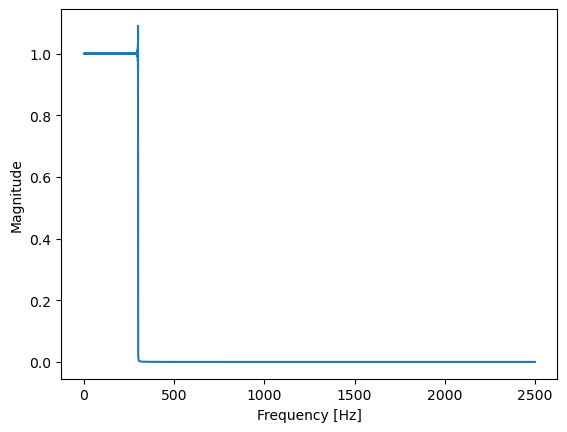

In [11]:
# Mostrando a resposta ao impulso do filtro h no dominio da frequência
fft_h = np.fft.fft(h)
freq_h = np.fft.fftfreq(len(fft_h), 1/fs)
freq_h = freq_h[:len(freq_h)//2]
fft_h = fft_h[:len(fft_h)//2]

plt.plot(freq_h, np.abs(fft_h))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.savefig('fft_h.pdf')
plt.show()


Fazendo agora a plotagem do sinal após o filtro

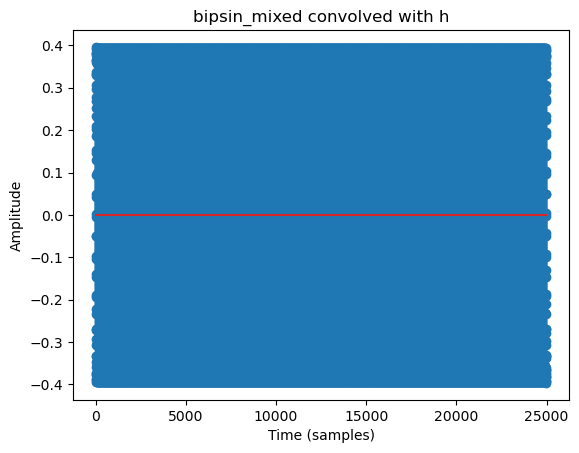

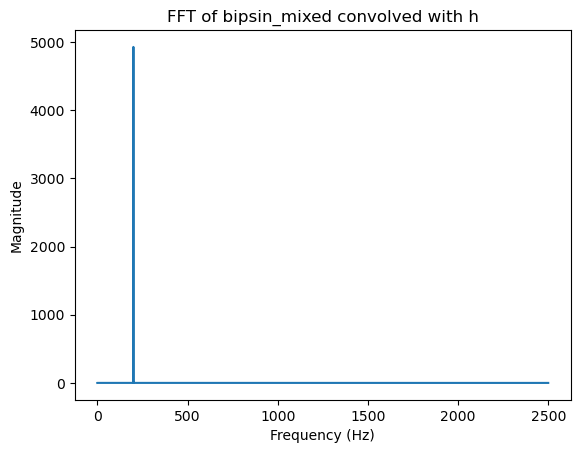

In [12]:
bipsinmixedconv = np.convolve(bipsin_mixed, h, mode='same')

plt.stem(bipsinmixedconv)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('bipsin_mixed convolved with h')
plt.show()

fft_bipsinmixedconv = np.fft.fft(bipsinmixedconv)
freqs = np.fft.fftfreq(len(bipsinmixedconv), 1/fs)
fft_bipsinmixedconv = fft_bipsinmixedconv[freqs >= 0]
freqs = freqs[freqs >= 0]

plt.plot(freqs ,np.abs(fft_bipsinmixedconv))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of bipsin_mixed convolved with h')
plt.show()
